In [18]:
import networkx as nx
import pandas as pd
import random
import matplotlib.pyplot as plt


In [19]:
# Create data
df_dict = {}
# Participant - Sample
df_dict['/participant-sample-config.py'] = pd.DataFrame([
    {'PARTICIPANT|ID': 'P{}'.format(i),
     'BIOSPECIMEN|ID': 'B{}'.format(i)}
    for i in range(1, 3)
])
# Sample Attr
df_dict['/sample-attr-config.py'] = pd.DataFrame([
    {'BIOSPECIMEN|ID': 'B{}'.format(i),
     'BIOSPECIMEN|TISSUE_TYPE': random.choice(['Tumor', 'Normal']),
     'PARTICIPANT|CONSENT_TYPE': random.choice(['GRU', 'SPECIAL'])
    }
    for i in range(1, 3)
])
# Genomic files
df_dict['/genomic-config.py'] = pd.DataFrame([
    {'BIOSPECIMEN|ID': 'B{}'.format(i),
     'GENOMIC_FILE|ID': 'GF{}'.format(i)
    }
    for i in range(1, 3)
])

In [29]:
df = df_dict['/sample-attr-config.py']
for r, row in df.iterrows():
    for c, col in enumerate(df.columns):
        print(r, c, row[col])
df

0 0 B1
0 1 Normal
0 2 GRU
1 0 B2
1 1 Tumor
1 2 GRU


,BIOSPECIMEN|ID,BIOSPECIMEN|TISSUE_TYPE,PARTICIPANT|CONSENT_TYPE
0,B1,Normal,GRU
1,B2,Tumor,GRU


In [3]:
g = nx.DiGraph()
g.add_edges_from([('SE', 'GF'),('F', 'P'),('P', 'B'), ('B', 'GF'), ('P', 'D')])

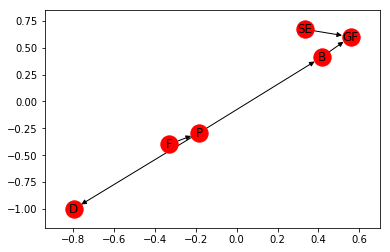

In [6]:
nx.draw_networkx(g)

In [17]:
for node in g.nodes:
    print('{} --> {}'.format(node, [s for s in g.successors(node)]))

SE --> ['GF']
GF --> []
F --> ['P']
P --> ['B', 'D']
B --> ['GF']
D --> []


In [35]:
nx.algorithms.shortest_paths.generic.has_path(g, 'SE', 'F')

False